In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

## In this dataset, we have demographic and employment data of individuals, including details such as age, education, occupation, and marital status, among other features. The income level of these individuals is influenced by various personal and work-related factors. Understanding these factors is crucial for better decision-making, particularly for policy-making, financial services, and targeted interventions aimed at improving financial wellbeing.



## The business problem we should solve here is: Determine which factors most strongly influence an individual’s income level, particularly in identifying those likely to earn above or below $50,000 per year. The dataset allows for a comprehensive analysis of socio-economic patterns and provides a platform to build models that can predict income level based on a variety of demographic and employment-related characteristics.

## Objective: Perform exploratory data analysis (EDA) and develop models to identify the most significant factors affecting income, assess various feasible models, and determine the most appropriate model for predicting income levels.



In [3]:
#df=pd.read_csv("/Users/it012305/Desktop/Project/data/adult_income.csv")

In [4]:
df=pd.read_csv("/Users/soumik/Downloads/adult_income.csv")

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Variables in the Dataset:
- age: The age of the individual.
- workclass: Type of employment (e.g., Private, Government, Self-Employed).
- fnlwgt: Final sample weight, representing how many people the individual represents.
- education: The highest level of education attained (e.g., Bachelors, HS-grad).
- education-num: Numerical representation of education level.
- marital-status: The marital status of the individual (e.g., Married, Never-married).
- occupation: The individual’s occupation category (e.g., Exec-managerial, Craft-repair).
- relationship: The relationship status within a family (e.g., Husband, Wife, Not-in-family).
- race: The race of the individual (e.g., White, Black, Asian).
- sex: Gender of the individual (Male, Female).
- capital-gain: Capital gains from investments.
- capital-loss: Losses from investments.
- hours-per-week: The number of hours worked per week.
- native-country: The country of origin for the individual.
- income: Binary target variable representing whether the individual's income is greater than or less than $50,000 per year.

In [7]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

### we can see there are values with ?. We should replace with an unknown term

In [8]:
df.replace('?','unknown',inplace=True)

In [9]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,unknown,77053,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,unknown,186061,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### There are no null values in our dataset 

### Univariate analysis

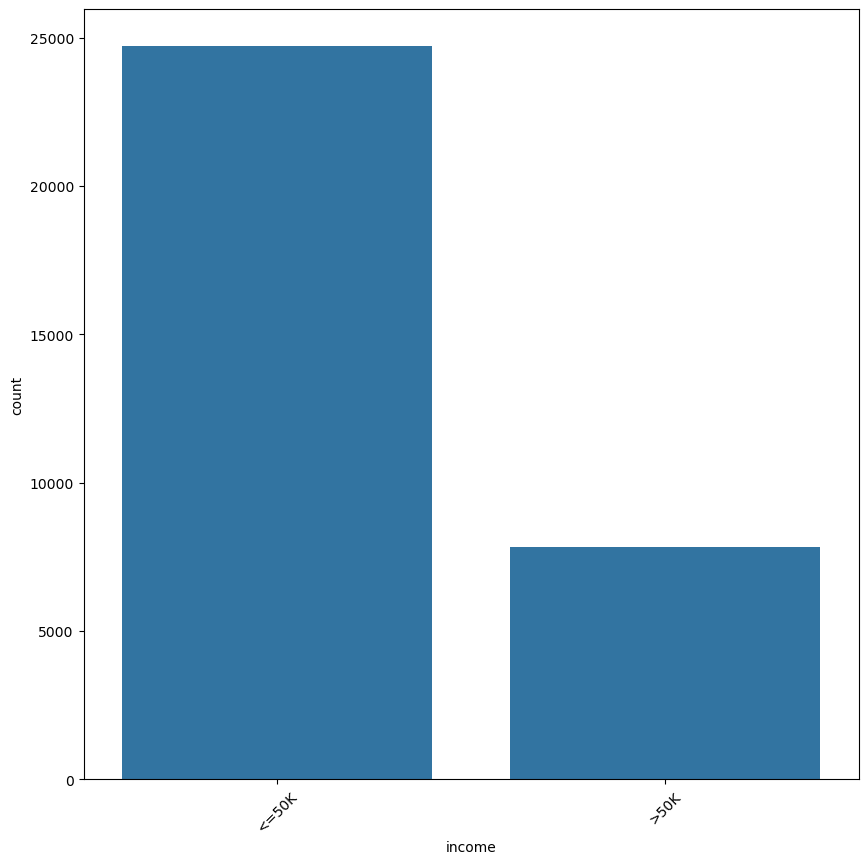

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(df,x='income')
plt.xticks(rotation=45)
plt.show()

### Conclusion from Count Plot of Income Levels

The count plot reveals that a significant majority of individuals in the dataset earn less than 50K while few earn more than 50K. This suggests a prevalence of lower income levels among the population, indicating potential economic challenges for a substantial portion of individuals. Understanding the factors contributing to this distribution can inform targeted interventions aimed at improving financial outcomes.

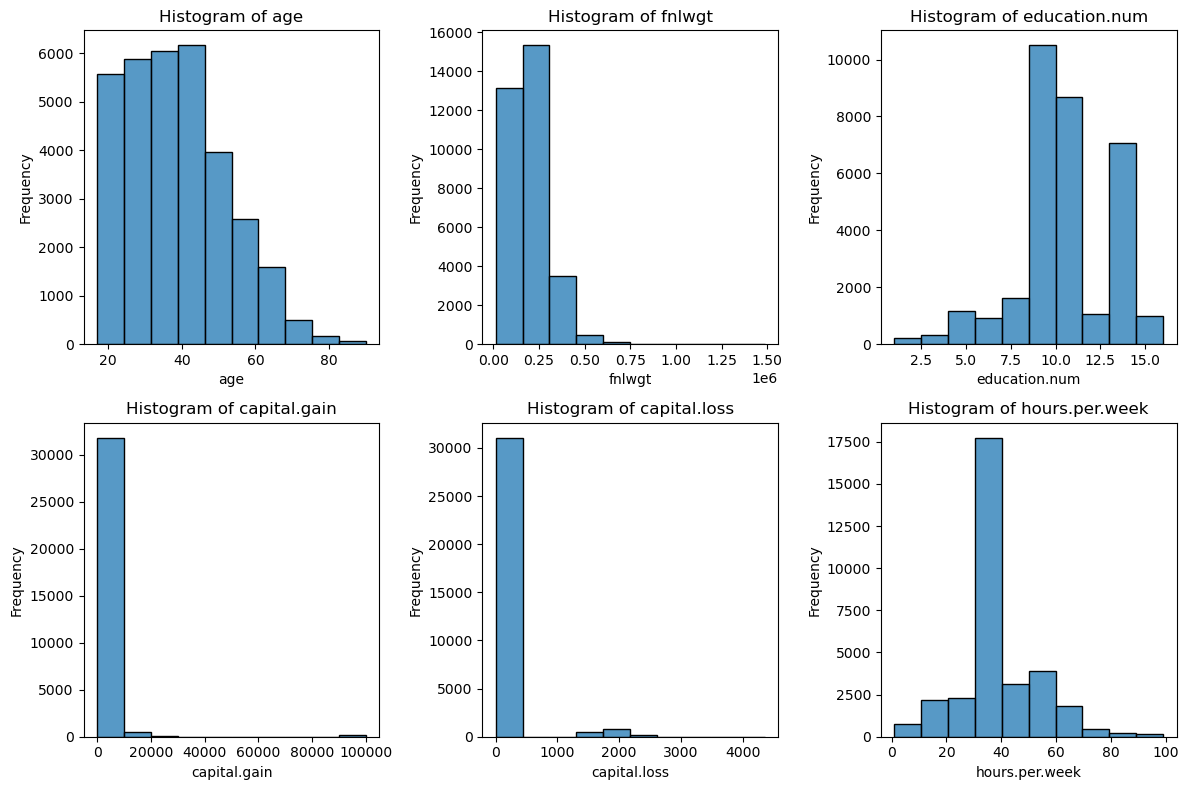

In [12]:

# Specify the columns you want to plot
columns_to_plot = ['age', 'fnlwgt', 'education.num','capital.gain','capital.loss','hours.per.week']  
# Determine how many rows and columns we need (3 columns per row)
num_columns = 3
num_rows = math.ceil(len(columns_to_plot) / num_columns)

# Set up the figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the columns and plot the histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=10, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Conclusion from Histograms of Numerical Variables

The histograms of numerical variables indicate the following trends:

Age: The age distribution is roughly bell-shaped, with most individuals concentrated between their late 20s and late 40s, suggesting a mature workforce.

Income: The income histogram aligns with the earlier findings, with a clear distinction between those earning less than $50K and a smaller group earning more, reflecting economic disparity.

Education Level: The education level shows a peak around high school and some college, indicating a diverse educational background among individuals.

Capital Gains: There is a drastic decrease in the frequency of capital gains, with most individuals reporting low or zero gains. A few outliers contribute to high capital gains, suggesting that substantial returns are uncommon.

Capital Losses: Similar to capital gains, capital losses are predominantly zero, with only a few instances of higher losses, indicating that losses are infrequent and concentrated among a small group.

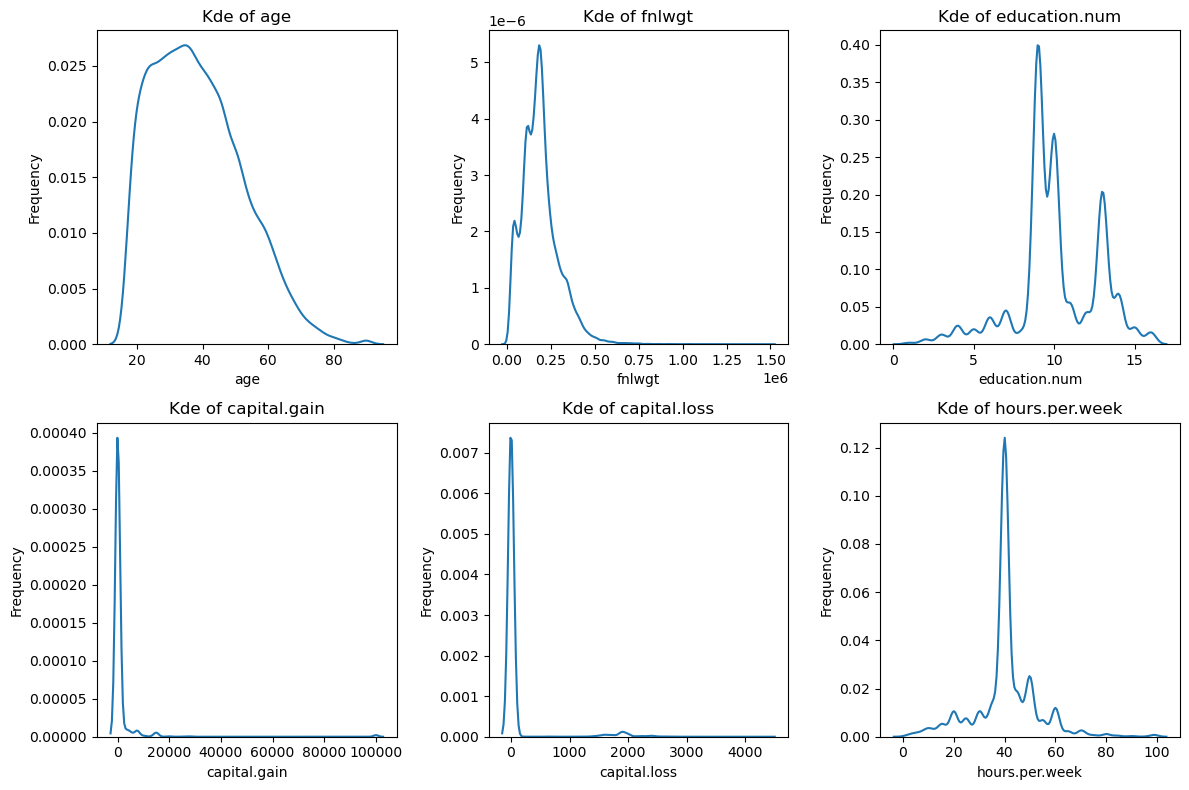

In [13]:

# Specify the columns you want to plot
columns_to_plot = ['age', 'fnlwgt', 'education.num','capital.gain','capital.loss','hours.per.week']  
# Determine how many rows and columns we need (3 columns per row)
num_columns = 3
num_rows = math.ceil(len(columns_to_plot) / num_columns)

# Set up the figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the columns and plot the histograms
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(df[column], ax=axes[i])
    axes[i].set_title(f'Kde of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Insights 
- The kde shows age,fnlwgt,capital.loss and capital.gain are right skewed
- education.num and hours.per.week are multimodal
- fnlwgt, age, capital.gain and capital.loss are unimodal 

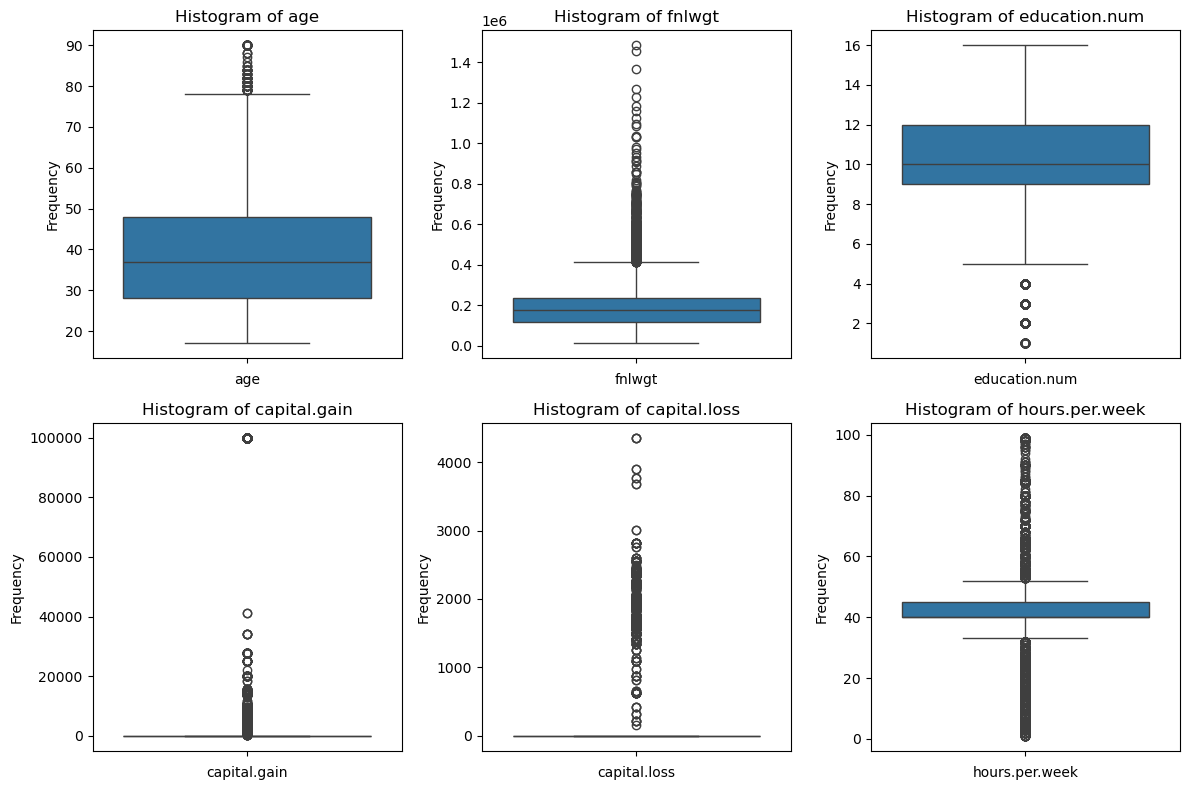

In [14]:

# Specify the columns you want to plot
columns_to_plot = ['age', 'fnlwgt', 'education.num','capital.gain','capital.loss','hours.per.week']  
# Determine how many rows and columns we need (3 columns per row)
num_columns = 3
num_rows = math.ceil(len(columns_to_plot) / num_columns)

# Set up the figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the columns and plot the histograms
for i, column in enumerate(columns_to_plot):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### The box plots reveal several key insights about the numerical variables:

Age: The age box plot shows a range from 17 to 90, with a median around 37. There are some outliers, but most individuals fall within a typical working age, suggesting a stable workforce.

Education Level: The box plot for education level indicates that most individuals have completed high school or some college. There are few outliers with very high education levels, suggesting a small proportion of individuals with advanced degrees.

Capital Gains: The capital gains box plot highlights a significant concentration of individuals reporting zero gains, with a few outliers showing extreme values. This indicates that while a few individuals benefit from high capital gains, the majority do not engage in significant investment activities.

Capital Losses: Similar to capital gains, the capital losses box plot shows most individuals reporting zero losses, with a small number experiencing high losses. This reinforces the idea that capital loss events are infrequent.

Hours Worked per Week: The box plot for hours worked shows a median around 40 hours, with most individuals working between 35 and 50 hours. There are some outliers working very few or an exceptionally high number of hours, suggesting variability in employment situations.

In [15]:
num_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

z_scores = np.abs((df[num_vars] - df[num_vars].mean()) / df[num_vars].std())

threshold = 3

df_no_outliers = df[(z_scores < threshold).all(axis=1)]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

Original DataFrame shape: (32561, 15)
DataFrame shape after removing outliers: (29828, 15)


## outlier removal

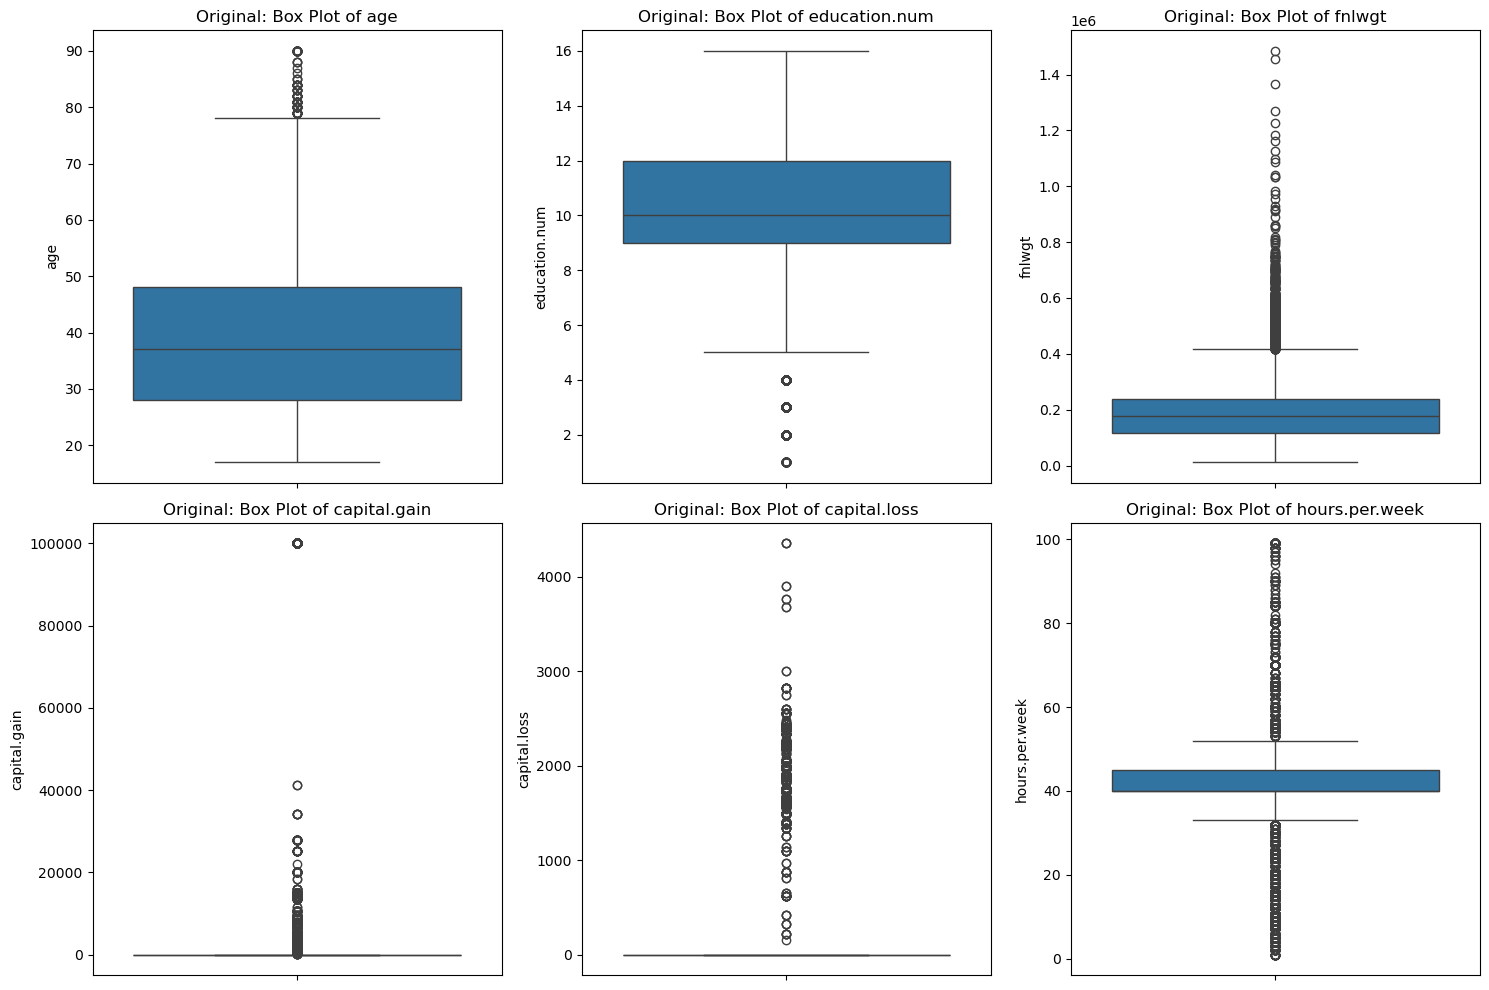

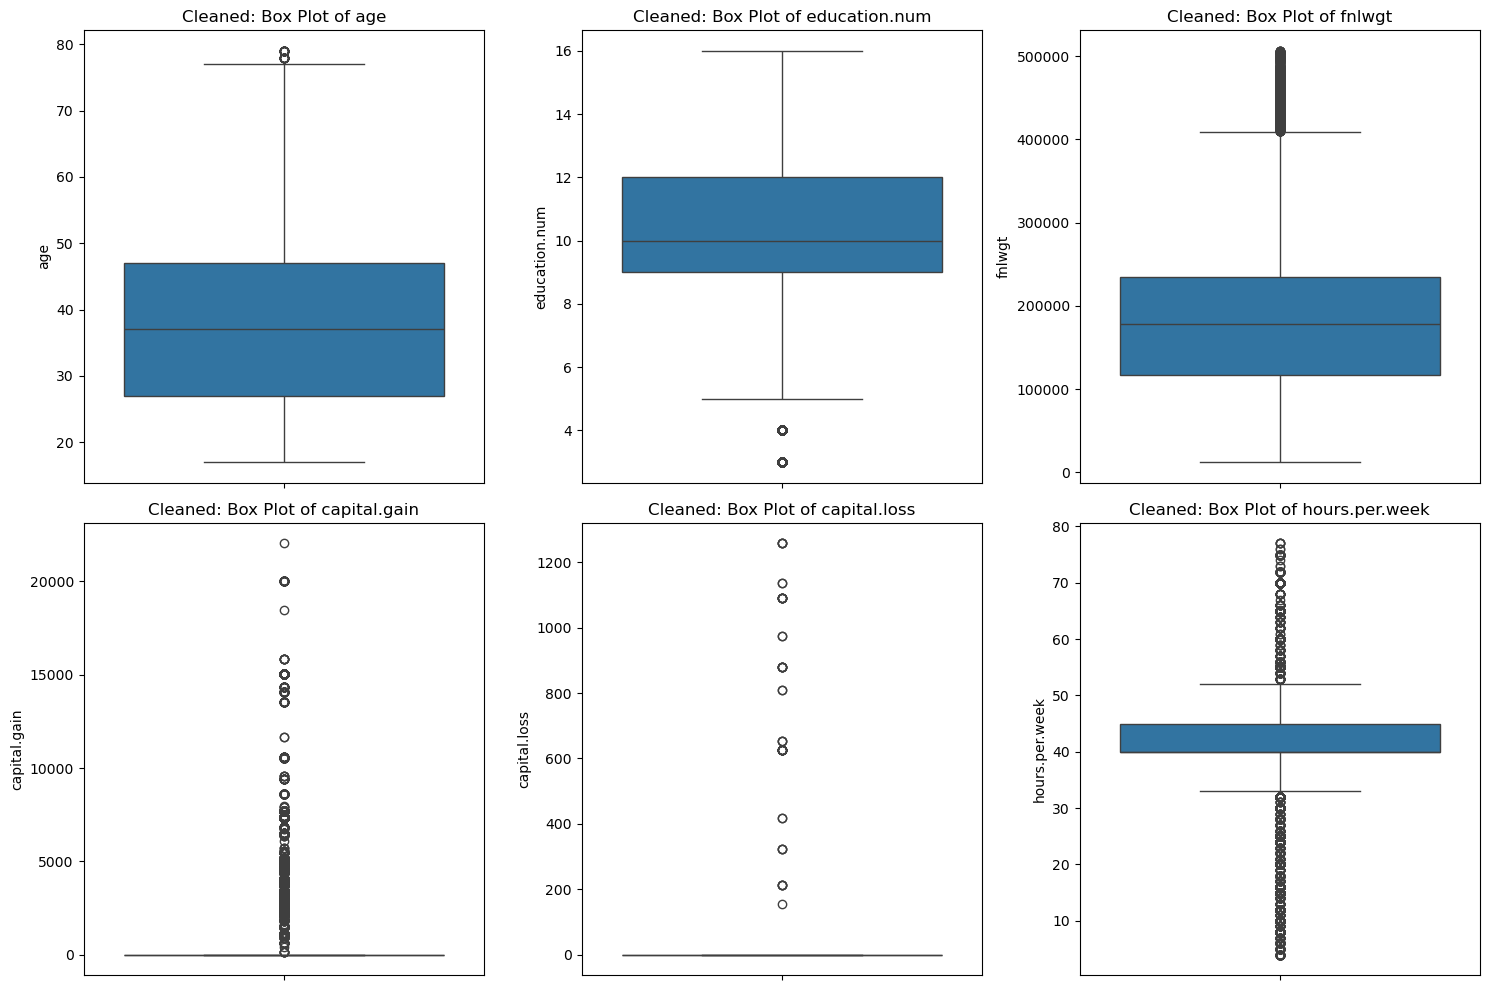

In [16]:

num_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

z_scores = np.abs((df[num_vars] - df[num_vars].mean()) / df[num_vars].std())
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

df_no_outliers = df[~outliers]

plt.figure(figsize=(15, 10))

for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=var)
    plt.title(f'Original: Box Plot of {var}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_no_outliers, y=var)
    plt.title(f'Cleaned: Box Plot of {var}')

plt.tight_layout()
plt.show()


### Conclusion from Z-Score Outlier Removal

Using Z-score analysis to identify and remove outliers in the dataset yielded the following insights:

Outlier Detection: The Z-score method identified data points that significantly deviate from the mean (typically those with a Z-score greater than 3 or less than -3) across numerical variables.

Data Cleanliness: After applying the Z-score threshold, the dataset became cleaner, with outliers removed from variables such as age, education level, capital gains, capital losses, and hours worked. This helps in ensuring that the analysis and modeling are not skewed by extreme values.

Impact on Analysis: Removing outliers allows for a more accurate representation of the underlying trends in the data, making the statistical analyses more reliable. This is particularly important for regression modeling and predictive analyses, as outliers can disproportionately influence results.

Variable Distributions: The distributions of the remaining variables are now more normal, providing a better foundation for further statistical analysis and modeling.

In [17]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Brief Conclusion of Dataset

Age: The average age of individuals is approximately 38.6 years, with a minimum age of 17 and a maximum of 90. This suggests a diverse age distribution, with most individuals likely being in their working years.

Final Weight (fnlwgt): The mean final weight is around 189,778, indicating that the dataset represents a broad population. The substantial range (from 12,285 to 1,484,705) suggests significant variability in how individuals represent the overall population.

Education Level: The average education level (measured by education.num) is approximately 10.1, which corresponds to some college education or high school graduation. The range from 1 (less than high school) to 16 (Doctorate) indicates a wide educational spectrum.

Capital Gains and Losses: The mean capital gain is relatively low at about 1,077.6, while the maximum observed value is quite high (99,999), indicating that a small number of individuals have significant capital gains. Conversely, capital losses have a mean of 87.3, with most individuals reporting zero losses, suggesting that capital losses are not common.

Hours Worked Per Week: The average number of hours worked per week is about 40.4, which aligns with standard full-time work hours. The minimum of 1 hour suggests that some individuals work part-time or are in unusual employment situations, while the maximum of 99 hours indicates extreme cases of overwork.

In [18]:
columns_to_plot = ['age', 'fnlwgt', 'education.num','capital.gain','capital.loss','hours.per.week']  

for i in columns_to_plot:
    skew=df[i].skew()
    kur=df[i].kurtosis()
    print(f"skewness of {i} is {skew} and kurtosis is {kur}")
    print("\n")

skewness of age is 0.5587433694130483 and kurtosis is -0.16612745957143993


skewness of fnlwgt is 1.4469800945789828 and kurtosis is 6.218810978153803


skewness of education.num is -0.31167586791022966 and kurtosis is 0.6234440747629244


skewness of capital.gain is 11.953847687699794 and kurtosis is 154.7994378542533


skewness of capital.loss is 4.594629121679696 and kurtosis is 20.37680171341222


skewness of hours.per.week is 0.227642536804501 and kurtosis is 2.9166867960020677




### Insights
- age is slightly positive skewed and platykurtic
- fnlwgt is positive skewed and leptokurtic
- education.num is slightly negative skewed and platykurtic
- capital.gain is highly positive skewed and extremely leptokurtic
- capital.loss is highly positive skewed and extremely leptokurtic
- hours.per.week is slightly positive skewed and close to normal

## bar plot 

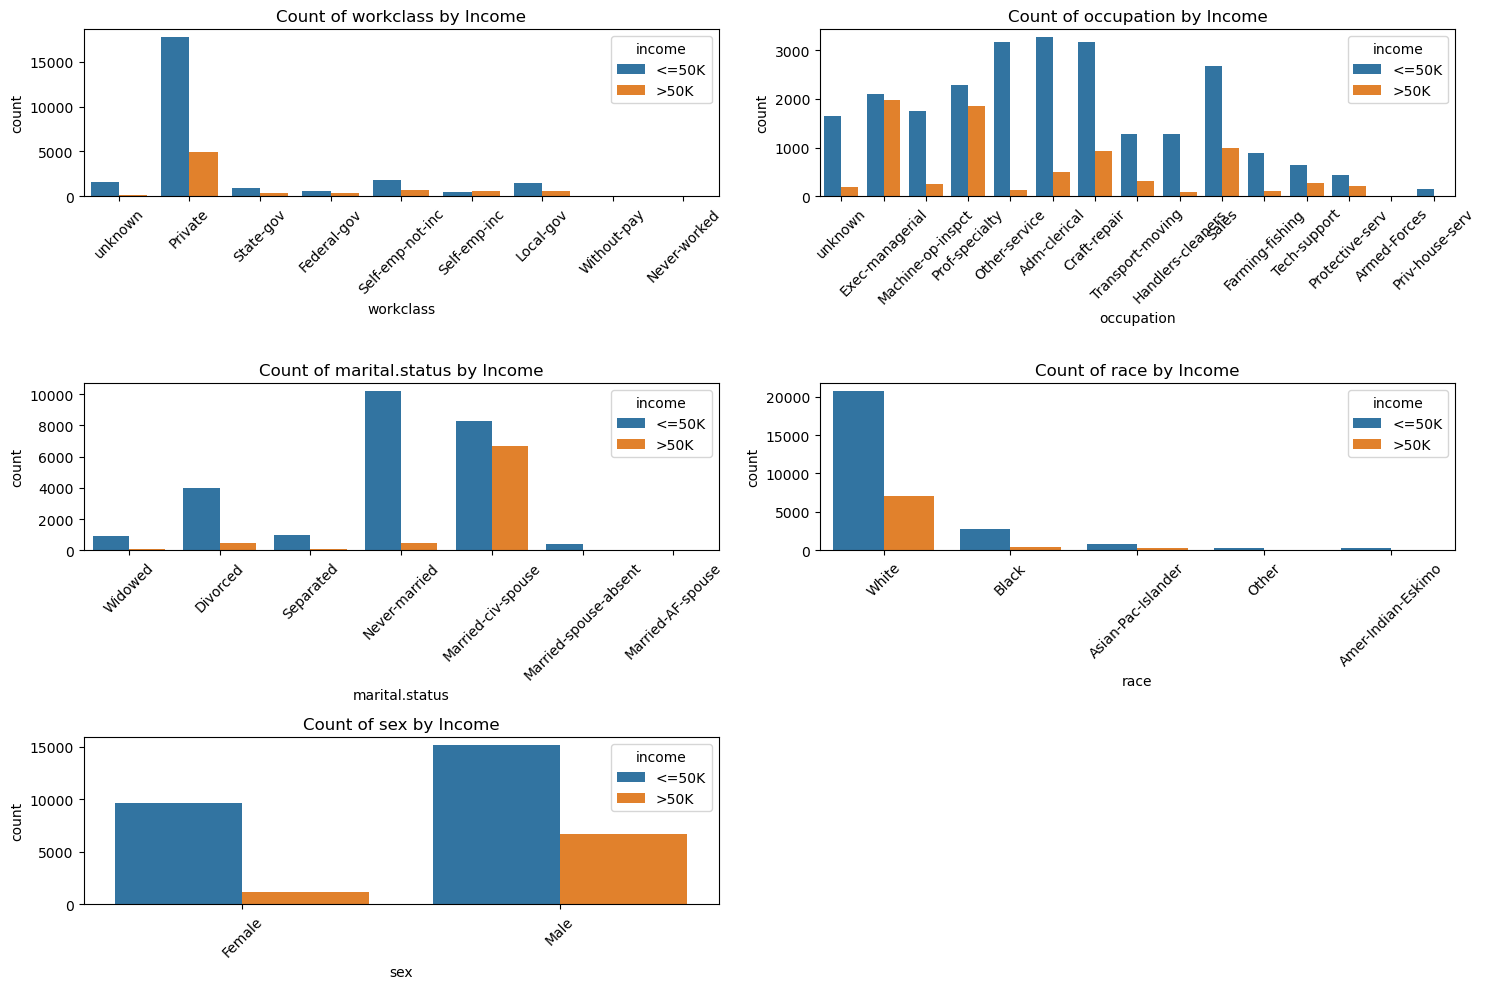

In [19]:
plt.figure(figsize=(15, 10))

categorical_vars = ['workclass', 'occupation', 'marital.status', 'race', 'sex']
numerical_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']

for i, cat_var in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=cat_var, hue='income')
    plt.title(f'Count of {cat_var} by Income')
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


<Axes: ylabel='workclass'>

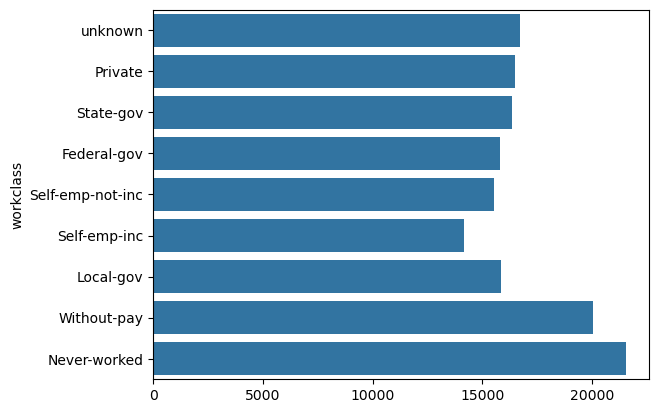

In [20]:
sns.barplot(df['workclass'],errorbar=None)

### the counts of the people who have never worked are highest 

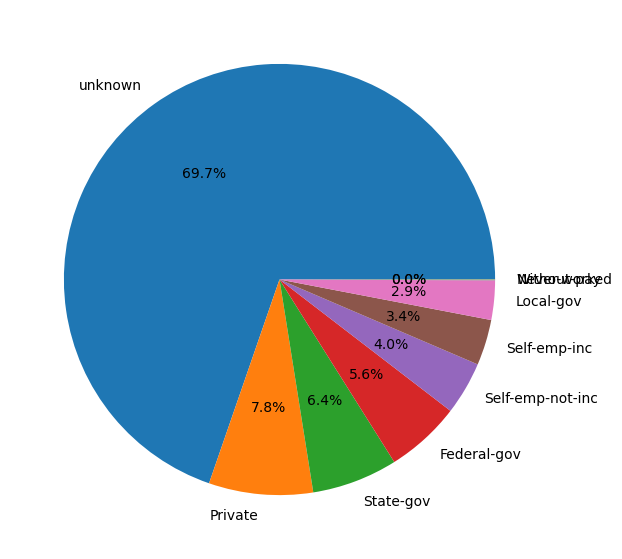

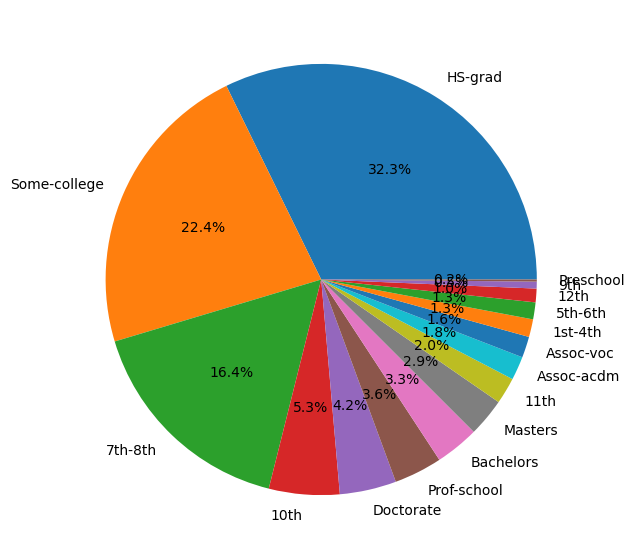

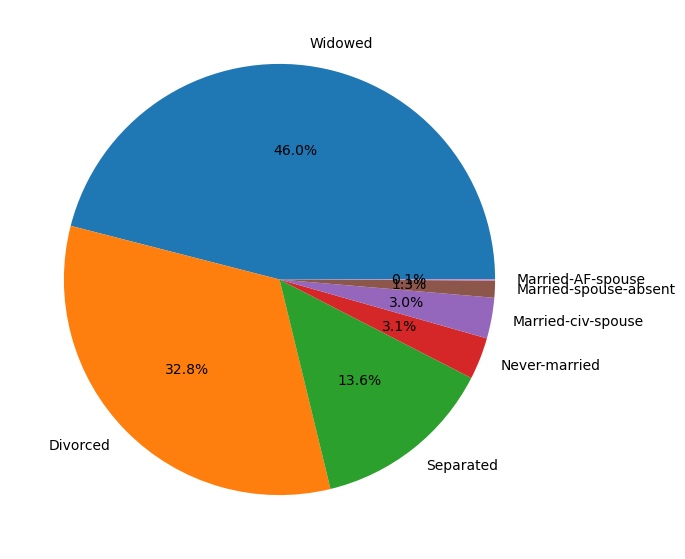

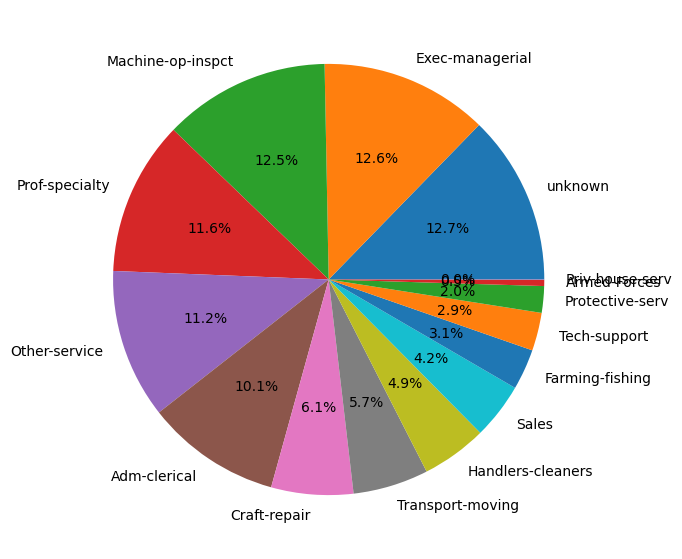

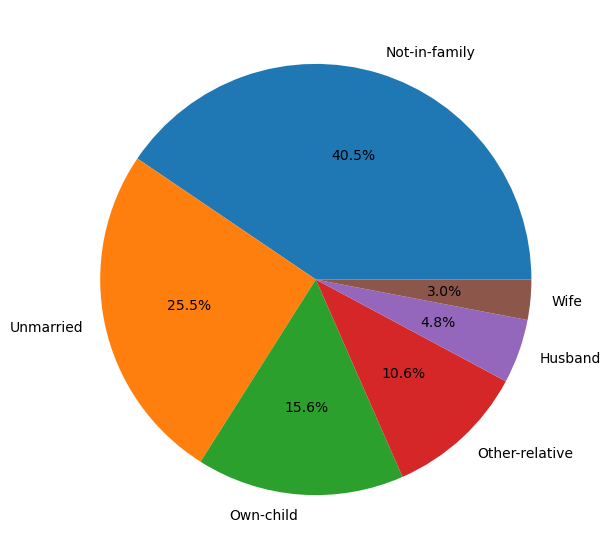

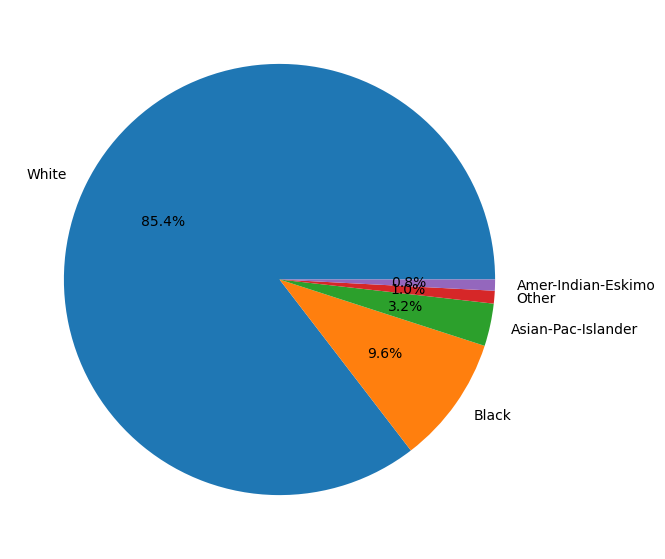

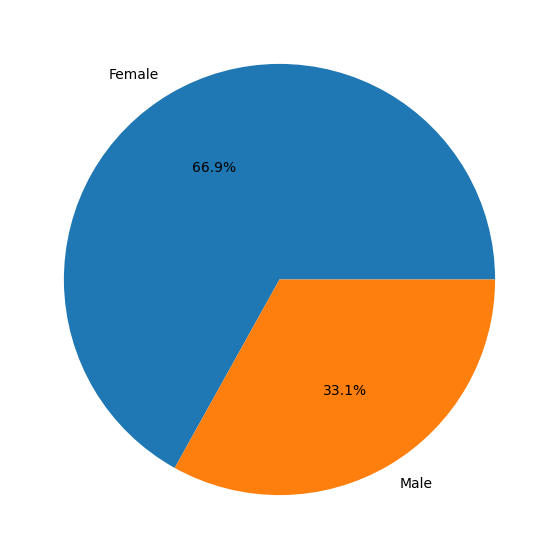

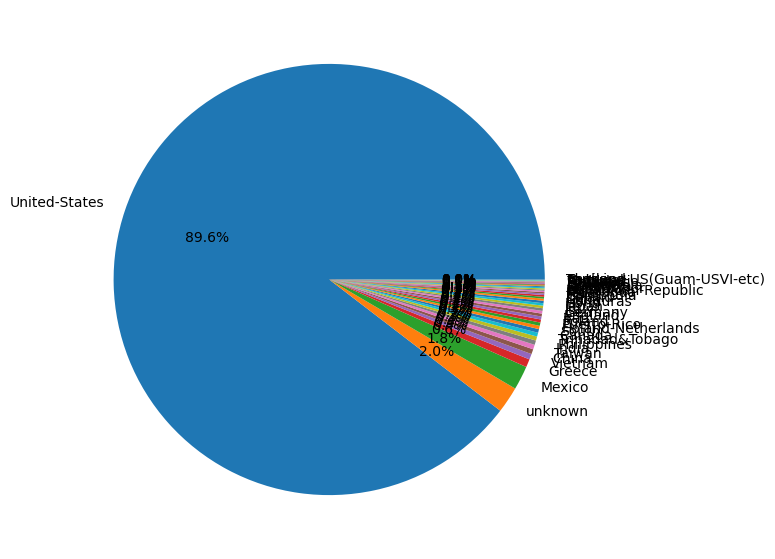

In [21]:
columns_to_plot = ['workclass', 'education', 'marital.status','occupation','relationship','race','sex','native.country']  
for col in columns_to_plot:
    fig = plt.figure(figsize=(10, 7))
    plt.pie(df[col].value_counts(),labels=df[col].unique(),autopct='%1.1f%%')
    plt.show()

### pie charts of categorical columns 

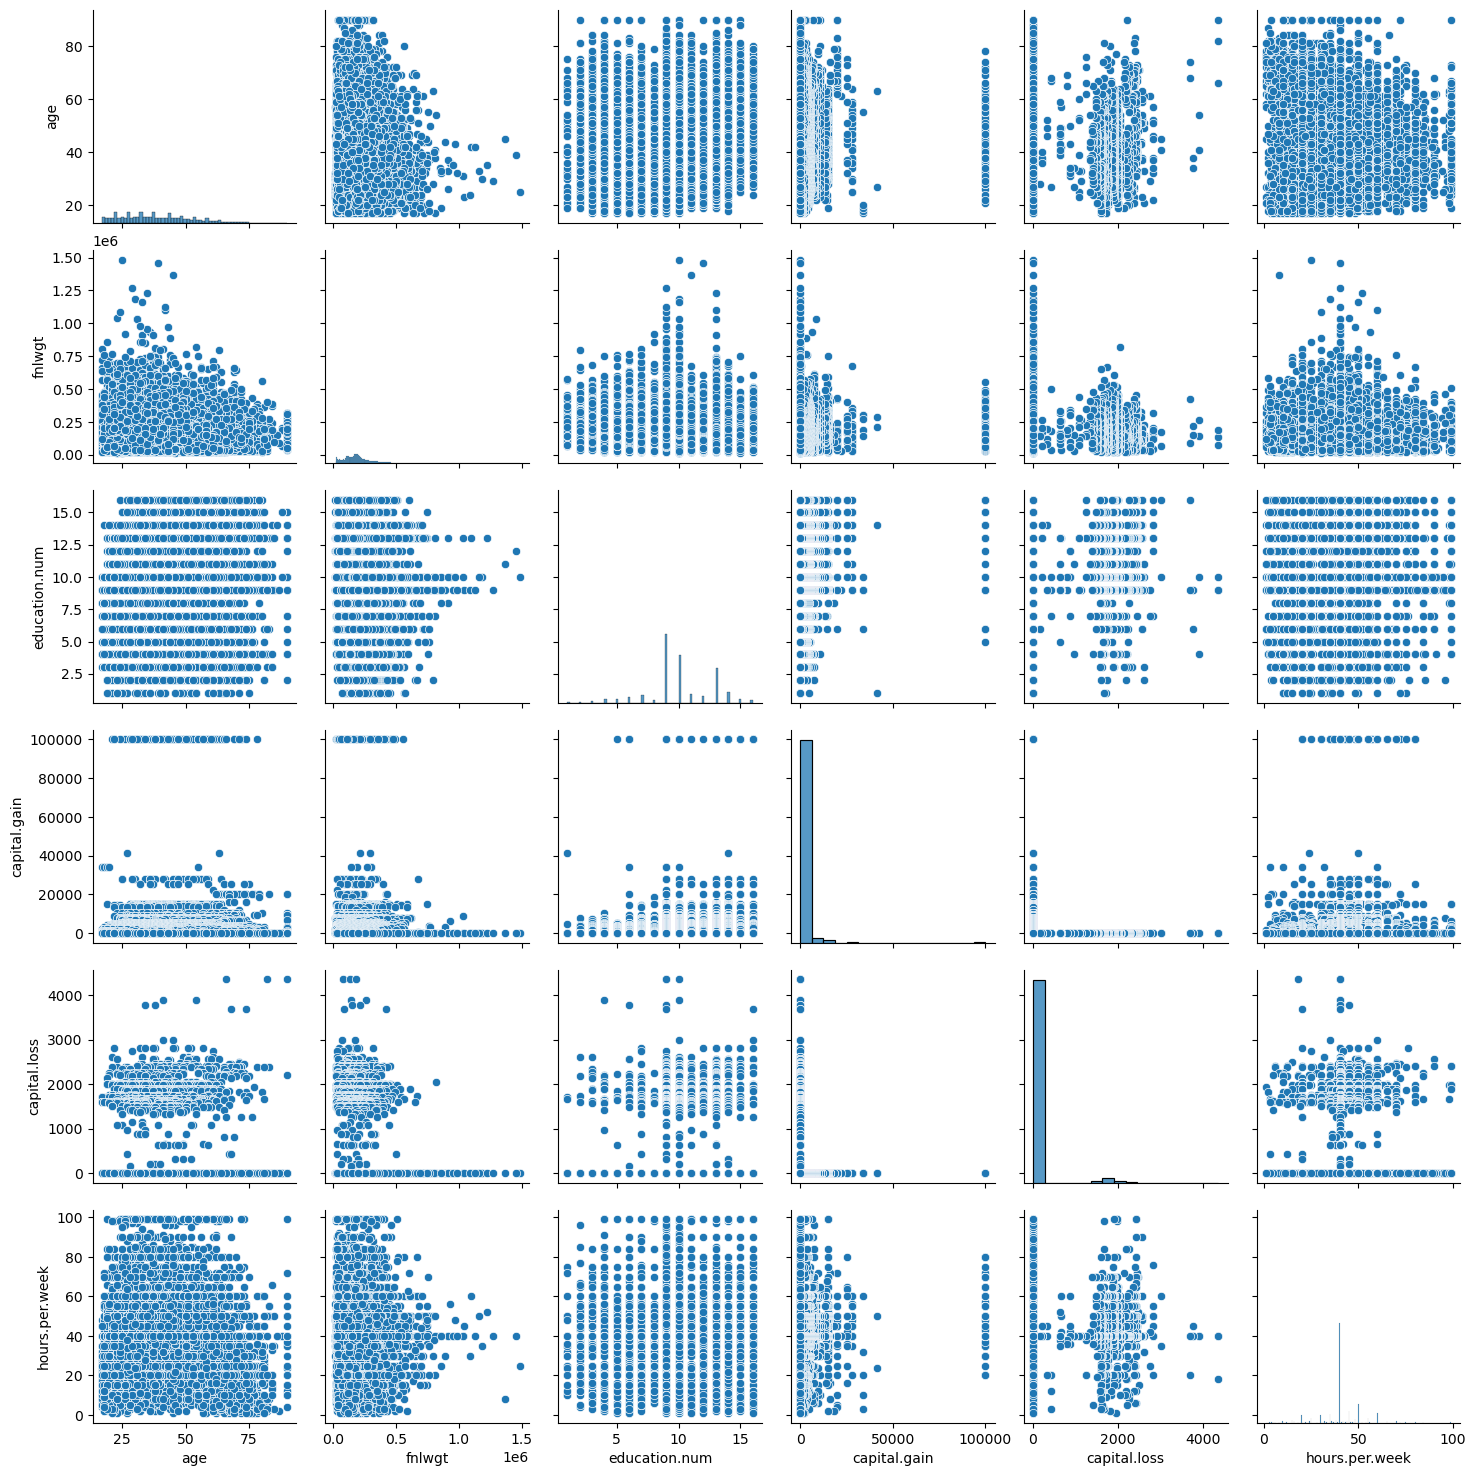

In [22]:
sns.pairplot(df)

### Insights
- age has negative correlation with fnlwgt
- we don't see any correlation with other features

### Data preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats



df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

occupation_groups = [group['income_binary'].values for name, group in df.groupby('occupation')]
f_statistic_occupation, p_value_occupation = stats.f_oneway(*occupation_groups)

marital_status_groups = [group['income_binary'].values for name, group in df.groupby('marital.status')]
f_statistic_marital, p_value_marital = stats.f_oneway(*marital_status_groups)

sex_groups = [group['income_binary'].values for name, group in df.groupby('sex')]
f_statistic_sex, p_value_sex = stats.f_oneway(*sex_groups)

print("ANOVA Results:")
print(f"Occupation - F-statistic: {f_statistic_occupation}, P-value: {p_value_occupation}")
print(f"Marital Status - F-statistic: {f_statistic_marital}, P-value: {p_value_marital}")
print(f"Sex - F-statistic: {f_statistic_sex}, P-value: {p_value_sex}")


ANOVA Results:
Occupation - F-statistic: 328.54918709801683, P-value: 0.0
Marital Status - F-statistic: 1357.8598024082576, P-value: 0.0
Sex - F-statistic: 1593.107907446717, P-value: 0.0


### All three factors—occupation, marital status, and sex—exhibit significant effects on the dependent variable, highlighting the importance of these demographic variables in understanding the variability in the data

In [24]:
from scipy.stats import chi2_contingency


occupation_table = pd.crosstab(df['occupation'], df['income'])
chi2_statistic_occupation, p_value_occupation, dof_occupation, expected_occupation = chi2_contingency(occupation_table)

marital_status_table = pd.crosstab(df['marital.status'], df['income'])
chi2_statistic_marital, p_value_marital, dof_marital, expected_marital = chi2_contingency(marital_status_table)

sex_table = pd.crosstab(df['sex'], df['income'])
chi2_statistic_sex, p_value_sex, dof_sex, expected_sex = chi2_contingency(sex_table)

print("Chi-Square Test Results:")
print(f"Occupation - Chi-Squared Statistic: {chi2_statistic_occupation}, P-value: {p_value_occupation}, Degrees of Freedom: {dof_occupation}")
print(f"Marital Status - Chi-Squared Statistic: {chi2_statistic_marital}, P-value: {p_value_marital}, Degrees of Freedom: {dof_marital}")
print(f"Sex - Chi-Squared Statistic: {chi2_statistic_sex}, P-value: {p_value_sex}, Degrees of Freedom: {dof_sex}")


Chi-Square Test Results:
Occupation - Chi-Squared Statistic: 4031.9742802471815, P-value: 0.0, Degrees of Freedom: 14
Marital Status - Chi-Squared Statistic: 6517.741653663022, P-value: 0.0, Degrees of Freedom: 6
Sex - Chi-Squared Statistic: 1517.813409134445, P-value: 0.0, Degrees of Freedom: 1


### All three categorical variables (occupation, marital status, and sex) exhibit significant associations with the outcome variable, suggesting that they are important factors to consider.

In [25]:
from scipy.stats import kruskal

groups = [group['capital.gain'].values for name, group in df.groupby('income_binary')]

stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis statistic: {stat}, p-value: {p_value}")


Kruskal-Wallis statistic: 2519.253119289777, p-value: 0.0


### This result implies that capital.gain group differs significantly from the income_binary

In [26]:
from scipy.stats import kruskal

groups = [group['fnlwgt'].values for name, group in df.groupby('income_binary')]

stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis statistic: {stat}, p-value: {p_value}")


Kruskal-Wallis statistic: 3.7539824021696027, p-value: 0.052681853496881155


### There are significant differences in capital.gain between the various income categories in our dataset.

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
#from hmmlearn import hmm

In [28]:
df1=df.copy()

In [29]:
encoder=OneHotEncoder(sparse_output=False)

In [30]:
categorical_columns = df1.select_dtypes(include=['object']).columns.tolist()

In [31]:
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

In [32]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df1, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [33]:
categorical_columns

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [34]:
le=LabelEncoder()

In [35]:
df1['workclass']=le.fit_transform(df['workclass'])

In [36]:
df1['education']=le.fit_transform(df['education'])
df1['marital.status']=le.fit_transform(df['marital.status'])
df1['occupation']=le.fit_transform(df['occupation'])
df1['relationship']=le.fit_transform(df['relationship'])
df1['race']=le.fit_transform(df['race'])
df1['sex']=le.fit_transform(df['sex'])
df1['native.country']=le.fit_transform(df['native.country'])

In [37]:
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
0,90,8,77053,11,9,6,14,1,4,0,0,4356,40,38,<=50K,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,<=50K,0
2,66,8,186061,15,10,6,14,4,2,0,0,4356,40,38,<=50K,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,<=50K,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,<=50K,0
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K,0
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,>50K,1
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K,0


In [38]:
cat_mat=df1.drop('income',axis=1)

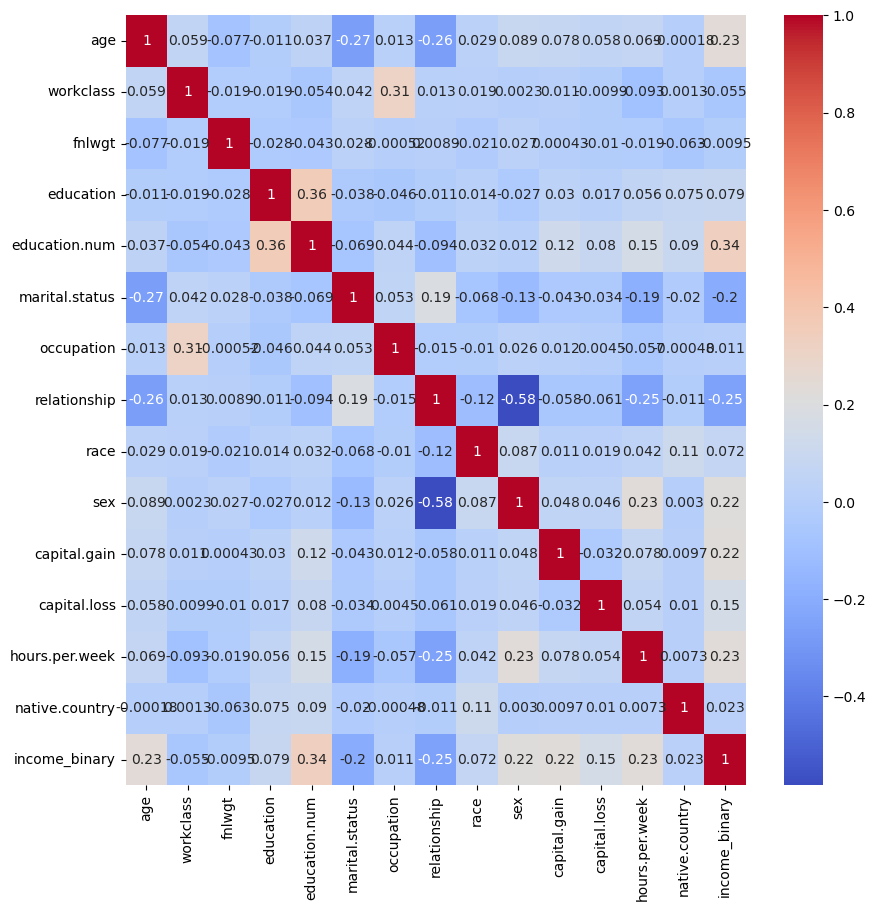

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(cat_mat.corr(),cmap='coolwarm',annot=True)
plt.show()

### Heatmap

Correlation Matrix: The heatmap provides a visual summary of correlations among numerical variables.

Strong Correlations: There are strong positive correlations between capital gains and income and moderate correlations between education level and income. This indicates that higher education and successful investments are associated with increased earnings.

Weaker Correlations: The correlation between capital losses and income is weak, suggesting that losses do not significantly impact overall income levels for most individuals.

In [40]:
df['capital.gain'].value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64

In [41]:
df['capital.loss'].value_counts()

capital.loss
0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: count, Length: 92, dtype: int64

### we can see that majority of values in capital.gain and capital.loss are zeroes

In [42]:
df['income_binary'].value_counts()

income_binary
0    24720
1     7841
Name: count, dtype: int64

### we can see that income is highly imbalanced in our dataset

In [43]:
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
0,90,8,77053,11,9,6,14,1,4,0,0,4356,40,38,<=50K,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,<=50K,0
2,66,8,186061,15,10,6,14,4,2,0,0,4356,40,38,<=50K,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,<=50K,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,<=50K,0
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K,0
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,>50K,1
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K,0


In [44]:
df2=df1.copy()

In [45]:
df2.drop('income',axis=1,inplace=True)

In [46]:
scaler=StandardScaler()

In [47]:
train_data, temp_data = train_test_split(df2, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [48]:
# reset indices
train_data.reset_index(drop=True, inplace=True)
validation_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [49]:
X_train = train_data.drop(columns=['income_binary'])
y_train = train_data['income_binary']
X_val = validation_data.drop(columns=['income_binary'])
y_val = validation_data['income_binary']
X_test = test_data.drop(columns=['income_binary'])
y_test = test_data['income_binary']

In [50]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [51]:
model=LogisticRegression()

In [52]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_valid_pred = model.predict(X_val_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_valid_pred)
print(f"Validation Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_val, y_valid_pred))


Validation Accuracy: 0.8255528255528255
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3692
           1       0.72      0.46      0.56      1192

    accuracy                           0.83      4884
   macro avg       0.78      0.70      0.73      4884
weighted avg       0.81      0.83      0.81      4884



In [54]:

coefficients = model.coef_[0]  # for binary classification, it's a 1D array

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)  # Use absolute values
})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


           Feature  Importance
10    capital.gain    2.272259
4    education.num    0.853925
0              age    0.483359
9              sex    0.420333
12  hours.per.week    0.349786
5   marital.status    0.349425
11    capital.loss    0.277704
7     relationship    0.193372
1        workclass    0.149472
8             race    0.110690
2           fnlwgt    0.066839
3        education    0.050033
6       occupation    0.014579
13  native.country    0.006729


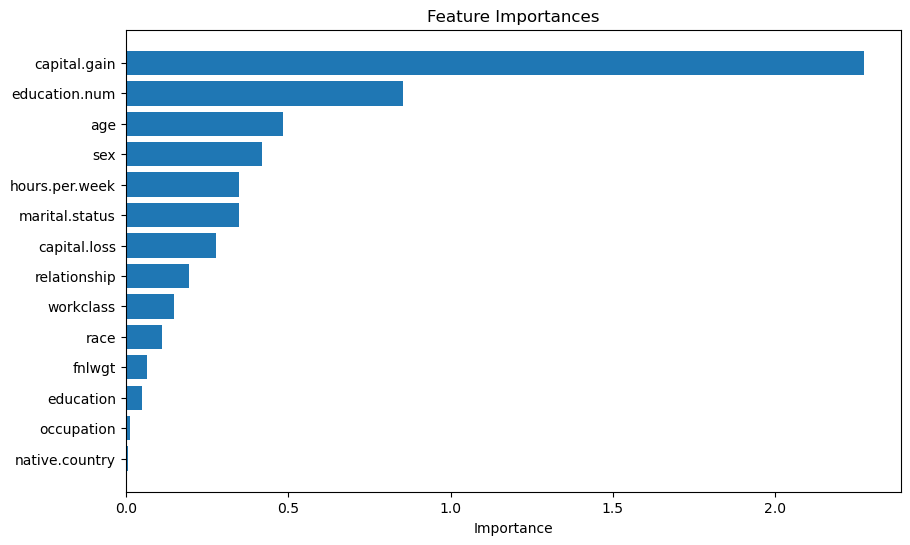

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


### capital.gain is the most important feature of our dataset

In [56]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=9)  # Choose the number of features you want
X_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Get selected features
selected_features_rfe = X_train.columns[rfe.support_]


In [57]:
print(selected_features_rfe)

Index(['age', 'workclass', 'education.num', 'marital.status', 'relationship',
       'sex', 'capital.gain', 'capital.loss', 'hours.per.week'],
      dtype='object')


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score

# LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
lda_pred = lda_model.predict(X_val_scaled)

# QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)
qda_pred = qda_model.predict(X_val_scaled)

# Evaluate LDA
print("LDA Accuracy:", accuracy_score(y_val, lda_pred))
print("LDA Classification Report:\n", classification_report(y_val, lda_pred))

# Evaluate QDA
print("QDA Accuracy:", accuracy_score(y_val, qda_pred))
print("QDA Classification Report:\n", classification_report(y_val, qda_pred))


LDA Accuracy: 0.8114250614250614
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      3692
           1       0.69      0.41      0.51      1192

    accuracy                           0.81      4884
   macro avg       0.76      0.67      0.70      4884
weighted avg       0.80      0.81      0.79      4884

QDA Accuracy: 0.806920556920557
QDA Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      3692
           1       0.72      0.34      0.47      1192

    accuracy                           0.81      4884
   macro avg       0.77      0.65      0.67      4884
weighted avg       0.79      0.81      0.78      4884



In [59]:
conf_matrix = confusion_matrix(y_val, qda_pred)

In [60]:
print(conf_matrix)

[[3531  161]
 [ 782  410]]


In [61]:
conf_matrix = confusion_matrix(y_val, lda_pred)
print(conf_matrix)

[[3479  213]
 [ 708  484]]


###  Giving better results 

In [62]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

#naive_bayes_model = GaussianNB()
#naive_bayes_model.fit(X_train_scaled, y_train)

naive_bayes_model = BernoulliNB()
naive_bayes_model.fit(X_train_scaled, y_train)

BernoulliNB()

In [63]:
svm_pred = svm_model.predict(X_val_scaled)
naive_bayes_pred = naive_bayes_model.predict(X_val_scaled)
naive_bayes_pred = naive_bayes_model.predict(X_val_scaled)

# Evaluation

print("SVM Accuracy:", accuracy_score(y_val, svm_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_val, naive_bayes_pred))

print("SVM Report:\n", classification_report(y_val, svm_pred))
print("Naive Bayes Report:\n", classification_report(y_val, naive_bayes_pred))

# Evaluate the model
#print("Naive Bayes Accuracy:", accuracy_score(y_val, naive_bayes_pred))
#print("Naive Bayes Classification Report:\n", classification_report(y_val, naive_bayes_pred))

SVM Accuracy: 0.8482800982800983
Naive Bayes Accuracy: 0.7968877968877969
SVM Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      3692
           1       0.76      0.55      0.64      1192

    accuracy                           0.85      4884
   macro avg       0.81      0.75      0.77      4884
weighted avg       0.84      0.85      0.84      4884

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3692
           1       0.58      0.58      0.58      1192

    accuracy                           0.80      4884
   macro avg       0.72      0.73      0.72      4884
weighted avg       0.80      0.80      0.80      4884



In [64]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train)

# Predictions
knn_pred = knn_model.predict(X_val_scaled)

# Evaluate KNN
print("KNN Accuracy:", accuracy_score(y_val, knn_pred))
print("KNN Classification Report:\n", classification_report(y_val, knn_pred))


KNN Accuracy: 0.8253480753480753
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      3692
           1       0.66      0.57      0.62      1192

    accuracy                           0.83      4884
   macro avg       0.77      0.74      0.75      4884
weighted avg       0.82      0.83      0.82      4884



In [65]:
# K-NC
knc_model = NearestCentroid()
knc_model.fit(X_train_scaled, y_train)

# Predictions
knc_pred = knc_model.predict(X_val_scaled)

# Evaluate K-NC
print("K-NC Accuracy:", accuracy_score(y_val, knc_pred))
print("K-NC Classification Report:\n", classification_report(y_val, knc_pred))


K-NC Accuracy: 0.7405814905814906
K-NC Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      3692
           1       0.48      0.80      0.60      1192

    accuracy                           0.74      4884
   macro avg       0.70      0.76      0.70      4884
weighted avg       0.81      0.74      0.76      4884



In [66]:
# K-NC
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

# Predictions
tree_pred = tree_model.predict(X_val_scaled)

# Evaluate K-NC
print("Decision Tree Accuracy:", accuracy_score(y_val, tree_pred))
print("Decision Tree Classification Report:\n", classification_report(y_val, tree_pred))


Decision Tree Accuracy: 0.8179770679770679
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      3692
           1       0.62      0.64      0.63      1192

    accuracy                           0.82      4884
   macro avg       0.75      0.76      0.75      4884
weighted avg       0.82      0.82      0.82      4884



### SVM is giving the best score 

### K fold Cross validation

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
model = LogisticRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.82430358 0.82540031 0.82492321 0.81790259 0.82887231]
Mean CV Score: 0.8243


In [69]:
model = LinearDiscriminantAnalysis()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.81026541 0.8135556  0.81768319 0.81285652 0.81987714]
Mean CV Score: 0.8148


In [70]:
model = QuadraticDiscriminantAnalysis()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.80434306 0.8078526  0.80605529 0.79881527 0.80408074]
Mean CV Score: 0.8042


In [71]:
model = BernoulliNB()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.79973678 0.80894933 0.80254498 0.79289162 0.81614743]
Mean CV Score: 0.8041


In [72]:
model = SVC()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.84689625 0.84689625 0.84203598 0.84028082 0.8532251 ]
Mean CV Score: 0.8459


In [73]:
model = KNeighborsClassifier()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.825839   0.83220004 0.82514261 0.82470382 0.82667837]
Mean CV Score: 0.8269


In [74]:
model = NearestCentroid()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.74117131 0.74051327 0.73321632 0.74001755 0.74659939]
Mean CV Score: 0.7403


In [75]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.80829129 0.80105286 0.81066257 0.80408074 0.80451953]
Mean CV Score: 0.8057


### SVM performs best 

## Smote for imbalanced dataset

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the classes after resampling
print(pd.Series(y_resampled).value_counts())


income_binary
0    17291
1    17291
Name: count, dtype: int64


In [78]:
model = SVC()
model.fit(X_resampled, y_resampled)

SVC()

In [79]:
svm_pred=model.predict(X_test)

In [80]:
cores = cross_val_score(model, X_resampled, y_resampled, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.80829129 0.80105286 0.81066257 0.80408074 0.80451953]
Mean CV Score: 0.8057


In [81]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.7981576253838281
SVM Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      3737
           1       0.77      0.20      0.32      1148

    accuracy                           0.80      4885
   macro avg       0.79      0.59      0.60      4885
weighted avg       0.79      0.80      0.75      4885



### SMOTE dosen't work well with the model and it has higher chances for overfitting. So, we skip this step

### PCA

Explained variance by PC1: 0.1770
Explained variance by PC2: 0.1215
Explained variance by PC3: 0.1193
Explained variance by PC4: 0.1144
Explained variance by PC5: 0.1119
Explained variance by PC6: 0.1047
Explained variance by PC7: 0.0956
Explained variance by PC8: 0.0801
Explained variance by PC9: 0.0757


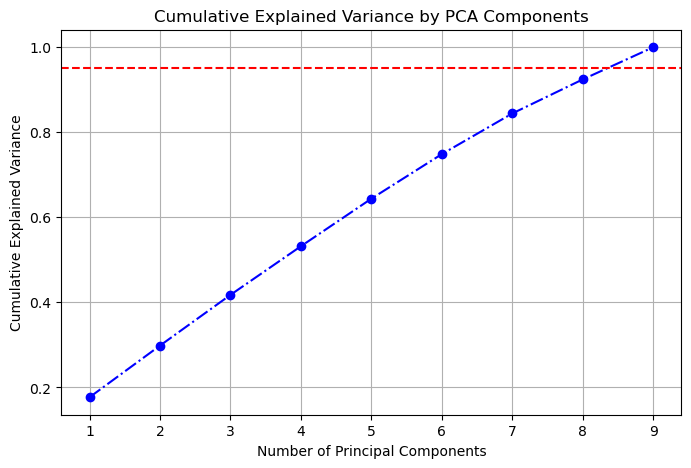

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


label_encoder = LabelEncoder()
df1['occupation_encoded'] = label_encoder.fit_transform(df1['occupation'])
df1['marital_status_encoded'] = label_encoder.fit_transform(df1['marital.status'])
df1['sex_encoded'] = label_encoder.fit_transform(df1['sex'])

numeric_vars = ['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss',
                'hours.per.week', 'occupation_encoded', 'marital_status_encoded', 'sex_encoded']

numeric_df = df1[numeric_vars]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=None)
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, var in enumerate(explained_variance):
    print(f"Explained variance by PC{i+1}: {var:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-.', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  
plt.show()


### Since there are multiple important features in our dataset dropping columns won't result in any significant change in our model and the accuracy 

### Final model 

In [83]:
train_data, temp_data = train_test_split(df2, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [84]:
# reset indices
train_data.reset_index(drop=True, inplace=True)
validation_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [85]:
X_train = train_data.drop(columns=['income_binary'])
y_train = train_data['income_binary']
X_val = validation_data.drop(columns=['income_binary'])
y_val = validation_data['income_binary']
X_test = test_data.drop(columns=['income_binary'])
y_test = test_data['income_binary']

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [87]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [88]:
X = pd.concat([X_train_scaled, X_val_scaled], ignore_index=True)
y=pd.concat([y_train, y_val], ignore_index=True)

In [89]:
model=SVC(kernel='rbf')
model.fit(X,y)

SVC()

In [92]:
svm_pred = svm_model.predict(X_val_scaled)

/opt/homebrew/Caskroom/miniconda/base/envs/pro/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [93]:
print("SVM Accuracy:", accuracy_score(y_val, svm_pred))
print("SVM Report:\n", classification_report(y_val, svm_pred))

SVM Accuracy: 0.8482800982800983
SVM Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      3692
           1       0.76      0.55      0.64      1192

    accuracy                           0.85      4884
   macro avg       0.81      0.75      0.77      4884
weighted avg       0.84      0.85      0.84      4884



In [94]:
scores = cross_val_score(model, X, y, cv=5)  
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores):.4f}")

Cross-Validation Scores: [0.84754335 0.84679313 0.84372177 0.85221319 0.84859982]
Mean CV Score: 0.8478


In [95]:
svm_pred = svm_model.predict(X_test_scaled)

/opt/homebrew/Caskroom/miniconda/base/envs/pro/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [96]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.852200614124872
SVM Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      3737
           1       0.76      0.55      0.63      1148

    accuracy                           0.85      4885
   macro avg       0.81      0.75      0.77      4885
weighted avg       0.84      0.85      0.84      4885



## Randomsearchcv

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']  
}


# Create the SVC model
svc = SVC()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, 
                                   n_iter=50,  # Number of random combinations to try
                                   scoring='accuracy',  # Use accuracy as the scoring metric
                                   cv=5,  # Number of cross-validation folds
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)


# Best parameters
print("Best Parameters:", random_search.best_params_)

# Make predictions on the test set using the best model
best_model = random_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))

/opt/homebrew/Caskroom/miniconda/base/envs/pro/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

## Bayesian optimization 

In [100]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the function to optimize
def svc_evaluate(C, gamma):
    svc = SVC(C=C, gamma=gamma, kernel='rbf')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Define the bounds for the parameters
pbounds = {
    'C': (0.1, 1000),  # Continuous range for C
    'gamma': (0.001, 10)  # Continuous range for gamma (scale and auto are not included)
}

# Create the Bayesian Optimization object
optimizer = BayesianOptimization(
    f=svc_evaluate,
    pbounds=pbounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(
    init_points=5,  # Number of random initialization points
    n_iter=50,      # Number of optimization iterations
)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", optimizer.max['params'])
print("Best Accuracy:", optimizer.max['target'])

# Using the best parameters to evaluate the model
best_params = optimizer.max['params']
best_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel='rbf')
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))


|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.7643    | 374.6     | 9.507     |


KeyboardInterrupt: 